In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os

In [4]:
os.chdir("E:\\Data Science\\TestLeaf\\02 LinearRegression\\")

In [6]:
df = pd.read_csv("USA_Housing.csv")

In [7]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [14]:
df.describe(percentiles=[0,.3,.5,.7,.9])

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
0%,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
30%,62931.344646,5.460120,6.462623,3.220000,30995.404698,1.048002e+06
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
70%,74231.546326,6.496726,7.518946,4.400000,41380.031481,1.418396e+06
90%,82081.188283,7.243978,8.274222,6.100000,48813.618633,1.684621e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [42]:
cols = list(df.columns)

In [52]:
if (len(np.where(df.isnull().sum()>1) [0])) != 0:
    for nonemptyrows in np.where(df.isnull().sum()>1) [0]:
        print(cols[nonemptyrows])
else:
    print("No empty cells")

No empty cells


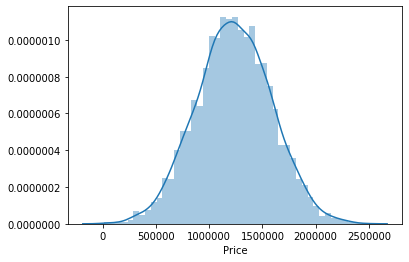

In [53]:
sns.distplot(df.Price)

In [54]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


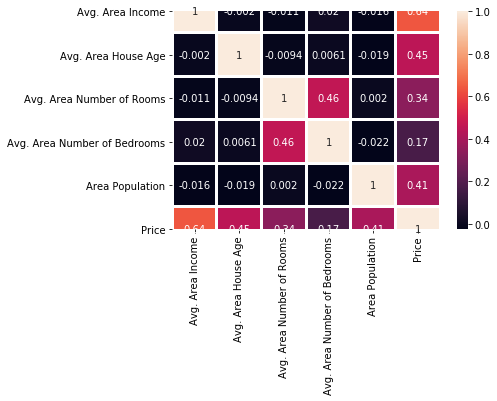

In [57]:
sns.heatmap(df.corr(),annot=True,linewidths=2)

In [66]:
X = df.iloc[:,0:5]
y=df.iloc[:,5:6]

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=102)

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lm = LinearRegression()

In [71]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
y_pred = lm.predict(X_test)

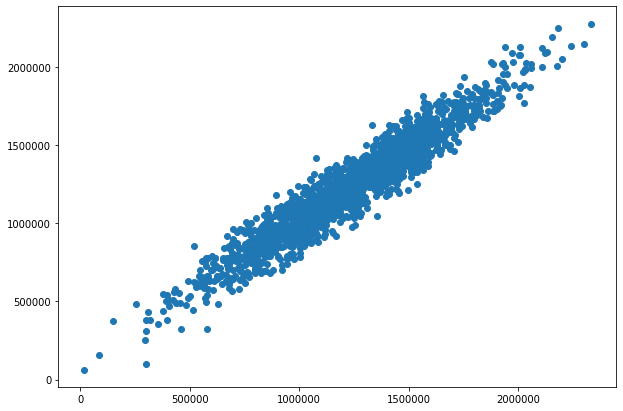

In [78]:
plt.figure(figsize=(10,7))
plt.scatter(y_test,y_pred)

In [79]:
from sklearn import metrics

In [94]:
print("MAE : ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE : ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 : ", round(metrics.r2_score(y_test,y_pred)* 100,2))

MAE :  81745.93110521829
MSE :  10317227091.688057
RMSE :  101573.75198193704
R2 :  91.56


# using OLS